In [4]:
import os
import pyodbc
import pandas as pd

# define creds here (temporary, for class)
os.environ["mssql_ccny_user"] = "julianagimolieca57"
os.environ["mssql_ccny_pw"] = "CCny24171157"

In [5]:
import pandas as pd 
import pyodbc
import os

server = 'johndroescher.com'
default_db = 'Sum_2025'
username = os.environ["mssql_ccny_user"]
password = os.environ["mssql_ccny_pw"]

cnxn = pyodbc.connect(
        "DRIVER={ODBC Driver 17 for SQL Server};SERVER="
        + server 
        + ";DATABASE="
        + default_db
        + ";UID="
        + username
        + ";PWD="
        + password 
    )

    # Set autocommit for queries to connect to SQL 
cnxn.autocommit = True

# Return the cursor
conn = cnxn.cursor()

In [6]:
import pandas as pd

query = "SELECT * FROM dbo.candy_products;"
df_products = pd.read_sql(query, cnxn)

# check first 5 rows
df_products.head()


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/123599433.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(query, cnxn)


,Division,Product_Name,Factory,Product_ID,Unit_Price,Unit_Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [7]:
df_products

,Division,Product_Name,Factory,Product_ID,Unit_Price,Unit_Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


In [8]:
df_products.head()

,Division,Product_Name,Factory,Product_ID,Unit_Price,Unit_Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [9]:
num_sales_per_yr = df_products.set_index('Product_Name')['Division']

In [1]:
!python3 -m pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

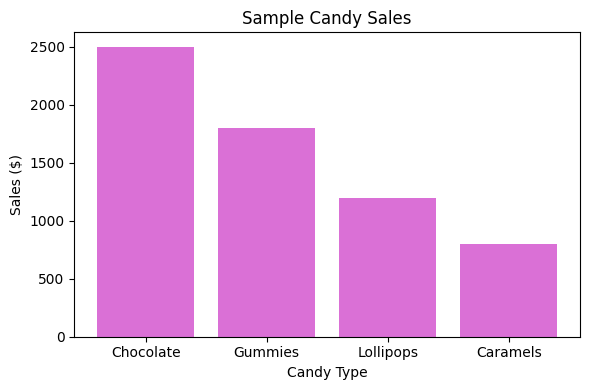

In [12]:
import matplotlib.pyplot as plt

# quick test chart
x = ["Chocolate", "Gummies", "Lollipops", "Caramels"]
y = [2500, 1800, 1200, 800]

plt.figure(figsize=(6,4))
plt.bar(x, y, color="orchid")
plt.title("Sample Candy Sales")
plt.xlabel("Candy Type")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()


In [13]:
df_top_products = pd.read_sql("""
SELECT TOP 10 Product_Name, SUM(Units) AS Total_Units_Sold
FROM dbo.candy_sales
GROUP BY Product_Name
ORDER BY Total_Units_Sold DESC
""", cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/427380442.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_products = pd.read_sql("""


In [14]:
df_top_products.head()


,Product_Name,Total_Units_Sold
0,Wonka Bar - Milk Chocolate,8267
1,Wonka Bar -Scrumdiddlyumptious,7743
2,Wonka Bar - Triple Dazzle Caramel,7596
3,Wonka Bar - Fudge Mallows,6914
4,Wonka Bar - Nutty Crunch Surprise,6755


In [34]:
sql_query = '''
SELECT TOP 10
     Product_Name
    ,SUM(Units) AS 'Total Units Sold'
    ,MIN(Order_Date) AS 'First Sale Date'
    ,MAX(Order_Date) AS 'Last Sale Date'
FROM dbo.candy_sales
GROUP BY Product_Name
ORDER BY [Total Units Sold] DESC
'''

df_top10 = pd.read_sql(sql_query, cnxn)
print(df_top10)

                        Product_Name  Total Units Sold First Sale Date  \
0         Wonka Bar - Milk Chocolate              8267      2021-01-03   
1     Wonka Bar -Scrumdiddlyumptious              7743      2021-01-04   
2  Wonka Bar - Triple Dazzle Caramel              7596      2021-01-04   
3          Wonka Bar - Fudge Mallows              6914      2021-01-06   
4  Wonka Bar - Nutty Crunch Surprise              6755      2021-01-04   
5                          Wonka Gum               478      2021-01-10   
6                 Lickable Wallpaper               393      2021-03-01   
7                          Kazookles               371      2021-01-13   
8                          SweeTARTS                41      2021-08-26   
9                        Laffy Taffy                27      2021-03-18   

  Last Sale Date  
0     2024-12-30  
1     2024-12-30  
2     2024-12-30  
3     2024-12-29  
4     2024-12-30  
5     2024-12-26  
6     2024-12-23  
7     2024-12-16  
8     2024-11-

/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/1545651056.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top10 = pd.read_sql(sql_query, cnxn)


Assigning to plot 

In [39]:
candy_sales_plot = df_top10.copy()

In [62]:
num_sales_per_candy = candy_sales_plot.set_index('Product_Name')['Total Units Sold']

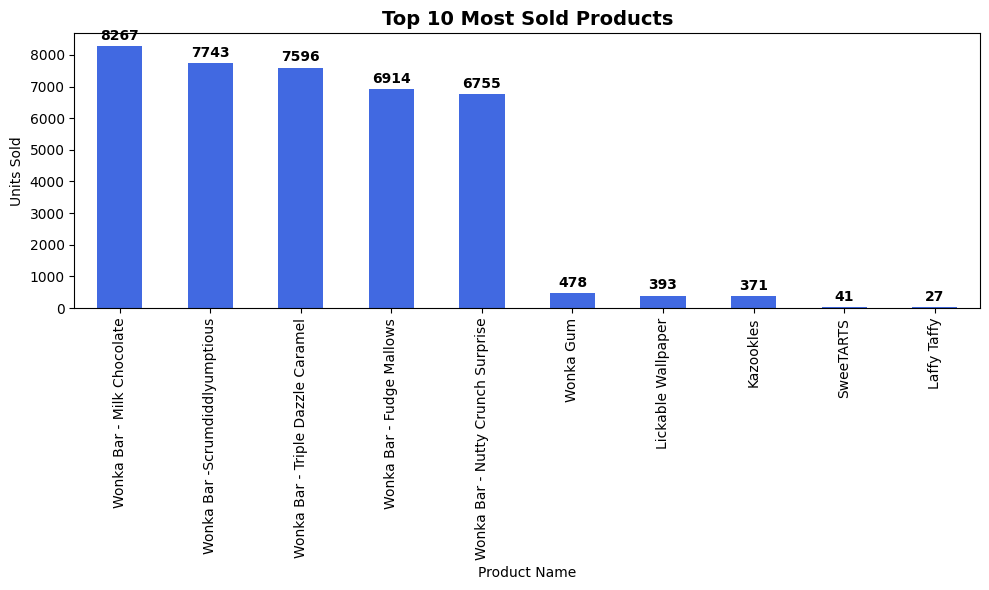

In [77]:
plt.figure(figsize=(10,6))
num_sales_per_candy.plot(kind='bar', color='royalblue')

plt.title('Top 10 Most Sold Products', fontsize=14, fontweight='bold')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')

# I want to add exact values to chart
for i, value in enumerate(num_sales_per_candy.values):
    plt.text(i, value + 100, f'{int(value)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
 
plt.tight_layout()



In [66]:
sql_query = '''
SELECT 
    Product_Name,
    FORMAT(Order_Date, 'yyyy-MM') AS Month,
    SUM(Units) AS Units_Sold
FROM dbo.candy_sales
GROUP BY Product_Name, FORMAT(Order_Date, 'yyyy-MM')
ORDER BY Month
'''

df_monthly = pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/4273873842.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly = pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3282846479.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_division = pd.read_sql(sql_query, cnxn)


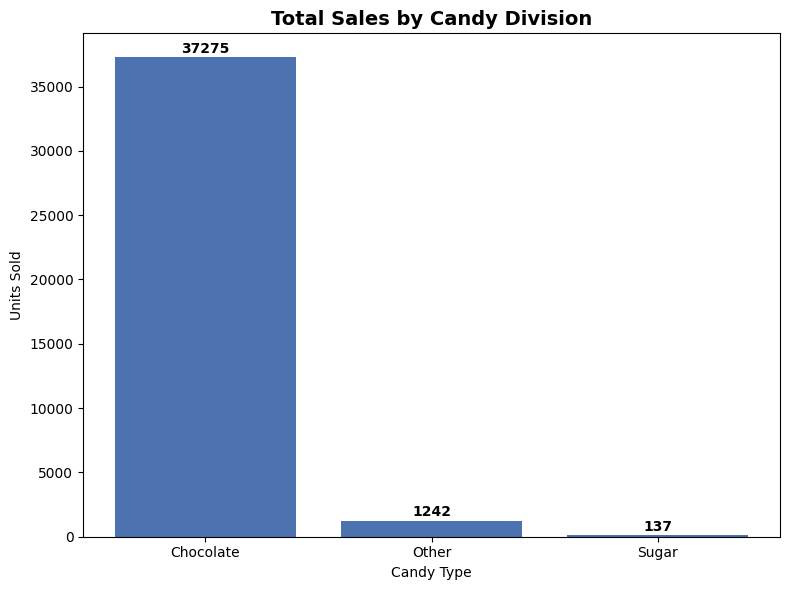

In [ ]:
sql_query = '''
SELECT Division, SUM(Units) AS Total_Units_Sold
FROM dbo.candy_sales
GROUP BY Division
ORDER BY Total_Units_Sold DESC
'''

df_division = pd.read_sql(sql_query, cnxn)

plt.figure(figsize=(8,6))
plt.bar(df_division['Division'], df_division['Total_Units_Sold'], color'#4C72B0')
plt.title('Total Sales by Candy Division', fontsize=14, fontweight='bold')
plt.xlabel('Candy Type')
plt.ylabel('Units Sold')

# I want to add exact values to chart
for i, value in enumerate(df_division['Total_Units_Sold']):
    plt.text(i, value + 100, f'{int(value)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()



In [83]:
sql_query = '''
SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE'
'''
pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/4090285067.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql_query, cnxn)


,TABLE_NAME
0,tx_deathrow
1,candy_distributor_data_dictionary
2,candy_factories
3,candy_products
4,candy_sales
5,candy_targets


In [90]:
sql_query = "SELECT TOP 5 * FROM dbo.candy_sales"
pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/2846758778.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql_query, cnxn)


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country_Region,City,State_Province,Postal_Code,Division,Region,Product_ID,Product_Name,Sales,Units,Gross_Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [91]:
sql_query = "SELECT TOP 5 * FROM dbo.candy_products"
pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/1215871638.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql_query, cnxn)


,Division,Product_Name,Factory,Product_ID,Unit_Price,Unit_Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [92]:
sql_query = "SELECT TOP 5 * FROM dbo.candy_targets"
pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/1995294701.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql_query, cnxn)


,Division,Target
0,Chocolate,27000
1,Sugar,15000
2,Other,3000


In [105]:
candy_sales_plot = df_top10.copy()

In [106]:
num_sales_per_candy = candy_sales_plot.set_index('Product_Name')['Total Units Sold']

In [107]:
sql_top5 = '''
SELECT TOP 5
     Product_Name
    ,SUM(Units) AS 'Total Units Sold'
FROM dbo.candy_sales
GROUP BY
     Product_Name
ORDER BY
     [Total Units Sold] DESC
'''
df_top5 = pd.read_sql(sql_top5, cnxn)
top5_names = df_top5['Product_Name'].tolist()
df_top5


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/2367321115.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top5 = pd.read_sql(sql_top5, cnxn)


,Product_Name,Total Units Sold
0,Wonka Bar - Milk Chocolate,8267
1,Wonka Bar -Scrumdiddlyumptious,7743
2,Wonka Bar - Triple Dazzle Caramel,7596
3,Wonka Bar - Fudge Mallows,6914
4,Wonka Bar - Nutty Crunch Surprise,6755


In [117]:
pd.read_sql("SELECT TOP 5 * FROM dbo.candy_sales", cnxn)
pd.read_sql("SELECT TOP 5 * FROM dbo.candy_products", cnxn)
pd.read_sql("SELECT TOP 5 * FROM dbo.candy_targets", cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3777552929.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT TOP 5 * FROM dbo.candy_sales", cnxn)
/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3777552929.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT TOP 5 * FROM dbo.candy_products", cnxn)
/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3777552929.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("SELECT TOP 5 * 

,Division,Target
0,Chocolate,27000
1,Sugar,15000
2,Other,3000


In [133]:
ORDER BY
     [Average Daily Demand] DESC
OFFSET 0 ROWS FETCH NEXT 5 ROWS ONLY


SyntaxError: invalid syntax (213533995.py, line 1)

In [134]:
sql_query = '''
SELECT
     Product_Name
    ,ROUND(AVG(daily_units), 2) AS 'Average Daily Demand'
FROM
    (
        SELECT
             Product_Name
            ,CAST(Order_Date AS DATE) AS 'Order_Day'
            ,SUM(Units) AS daily_units
        FROM candy_sales
        GROUP BY
             Product_Name
            ,CAST(Order_Date AS DATE)
    ) AS daily_summary
GROUP BY
     Product_Name
ORDER BY
     [Average Daily Demand] DESC
'''
df_avg_demand = pd.read_sql(sql_query, cnxn)
df_avg_demand


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3163307648.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_demand = pd.read_sql(sql_query, cnxn)


,Product_Name,Average Daily Demand
0,Wonka Bar - Milk Chocolate,9
1,Wonka Bar - Nutty Crunch Surprise,8
2,Wonka Bar -Scrumdiddlyumptious,8
3,Wonka Bar - Triple Dazzle Caramel,8
4,Wonka Bar - Fudge Mallows,8
5,SweeTARTS,4
6,Lickable Wallpaper,4
7,Everlasting Gobstopper,4
8,Hair Toffee,4
9,Wonka Gum,4


In [135]:
sql_query = '''
SELECT
     Product_Name
    ,ROUND(AVG(daily_units), 2) AS 'Average Daily Demand'
FROM
    (
        SELECT
             Product_Name
            ,CAST(Order_Date AS DATE) AS 'Order_Day'
            ,SUM(Units) AS daily_units
        FROM candy_sales
        GROUP BY
             Product_Name
            ,CAST(Order_Date AS DATE)
    ) AS daily_summary
GROUP BY
     Product_Name
ORDER BY
     [Average Daily Demand] DESC
OFFSET 0 ROWS FETCH NEXT 5 ROWS ONLY
'''
df_avg_demand = pd.read_sql(sql_query, cnxn)
df_avg_demand


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/1012125530.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_demand = pd.read_sql(sql_query, cnxn)


,Product_Name,Average Daily Demand
0,Wonka Bar - Milk Chocolate,9
1,Wonka Bar - Nutty Crunch Surprise,8
2,Wonka Bar -Scrumdiddlyumptious,8
3,Wonka Bar - Triple Dazzle Caramel,8
4,Wonka Bar - Fudge Mallows,8


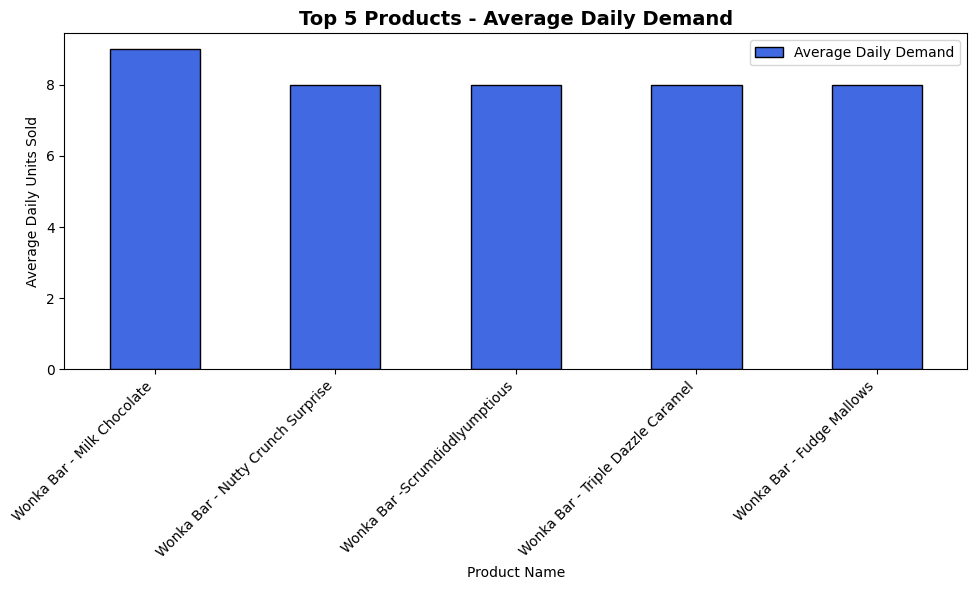

In [138]:
avg_chart = df_avg_demand.set_index('Product_Name')

ax = avg_chart.plot(kind='bar', figsize=(10,6), color='royalblue', edgecolor='black')
plt.title('Top 5 Products - Average Daily Demand', fontsize=14, fontweight='bold')
plt.xlabel('Product Name')
plt.ylabel('Average Daily Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [142]:
sql_query = '''
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'candy_sales'
'''
pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3112051108.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql_query, cnxn)


,COLUMN_NAME
0,Row_ID
1,Order_ID
2,Order_Date
3,Ship_Date
4,Ship_Mode
5,Customer_ID
6,Country_Region
7,City
8,State_Province
9,Postal_Code


In [143]:
sql_query = '''
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'candy_targets'
'''
pd.read_sql(sql_query, cnxn)


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/1196297682.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql_query, cnxn)


,COLUMN_NAME
0,Division
1,Target


In [144]:
sql_query = '''
SELECT
     candy_sales.Product_Name
    ,FORMAT(candy_sales.Order_Date, 'yyyy-MM') AS 'Month'
    ,SUM(candy_sales.Units) AS 'Total Units Sold'
    ,AVG(candy_targets.Target) AS 'Target Inventory'
FROM candy_sales
JOIN candy_targets
    ON candy_sales.Division = candy_targets.Division
GROUP BY
     candy_sales.Product_Name
    ,FORMAT(candy_sales.Order_Date, 'yyyy-MM')
ORDER BY
     [Month]
'''
df_trend = pd.read_sql(sql_query, cnxn)
df_trend


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/1344083437.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(sql_query, cnxn)


,Product_Name,Month,Total Units Sold,Target Inventory
0,Kazookles,2021-01,3,3000
1,Wonka Bar - Fudge Mallows,2021-01,53,27000
2,Wonka Bar - Milk Chocolate,2021-01,91,27000
3,Wonka Bar - Nutty Crunch Surprise,2021-01,31,27000
4,Wonka Bar - Triple Dazzle Caramel,2021-01,78,27000
...,...,...,...,...
386,Wonka Bar - Milk Chocolate,2024-12,416,27000
387,Wonka Bar - Nutty Crunch Surprise,2024-12,269,27000
388,Wonka Bar - Triple Dazzle Caramel,2024-12,400,27000
389,Wonka Bar -Scrumdiddlyumptious,2024-12,423,27000


In [145]:
# 1️⃣ Query: Get monthly sales and target inventory
sql_query = '''
SELECT
     candy_sales.Product_Name
    ,FORMAT(candy_sales.Order_Date, 'yyyy-MM') AS 'Month'
    ,SUM(candy_sales.Units) AS 'Total Units Sold'
    ,AVG(candy_targets.Target) AS 'Target Inventory'
FROM candy_sales
JOIN candy_targets
    ON candy_sales.Product_Name = candy_targets.Division
GROUP BY
     candy_sales.Product_Name
    ,FORMAT(candy_sales.Order_Date, 'yyyy-MM')
ORDER BY
     [Month]
'''

df_trend = pd.read_sql(sql_query, cnxn)
df_trend


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/525349883.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(sql_query, cnxn)


,Product_Name,Month,Total Units Sold,Target Inventory


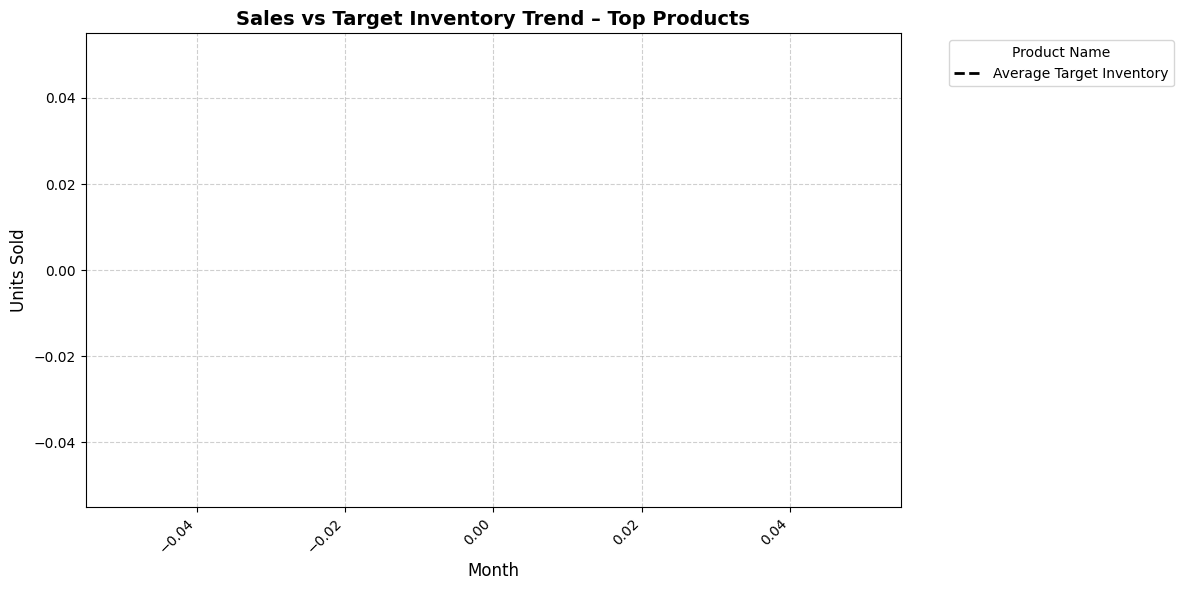

In [146]:
# 2️⃣ Plot: Sales vs Target Inventory Trend
plt.figure(figsize=(12,6))

for product in df_trend['Product_Name'].unique():
    product_data = df_trend[df_trend['Product_Name'] == product]
    plt.plot(product_data['Month'], product_data['Total Units Sold'], 
             marker='o', linewidth=2, label=f'{product} – Sales')

# Add a smooth line showing overall target inventory average
plt.plot(df_trend['Month'].unique(), 
         [df_trend['Target Inventory'].mean()] * len(df_trend['Month'].unique()), 
         color='black', linestyle='--', linewidth=2, label='Average Target Inventory')

plt.title('Sales vs Target Inventory Trend – Top Products', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


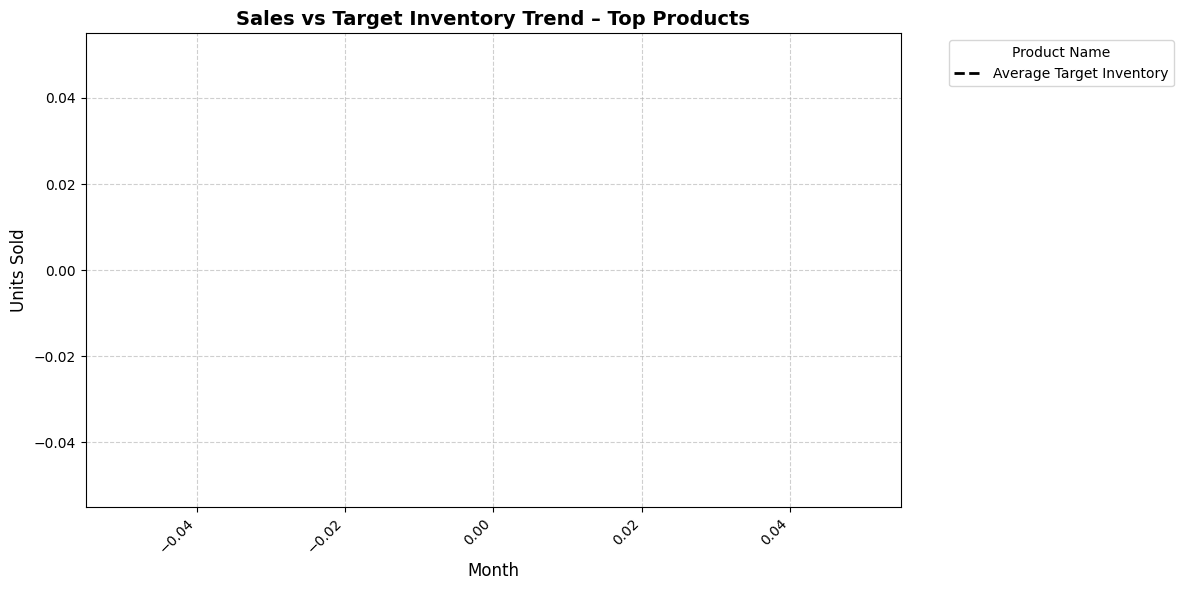

In [147]:
# 2️⃣ Plot: Sales vs Target Inventory Trend
plt.figure(figsize=(12,6))

for product in df_trend['Product_Name'].unique():
    product_data = df_trend[df_trend['Product_Name'] == product]
    plt.plot(product_data['Month'], product_data['Total Units Sold'], 
             marker='o', linewidth=2, label=f'{product} – Sales')

# Add a smooth line showing overall target inventory average
plt.plot(df_trend['Month'].unique(), 
         [df_trend['Target Inventory'].mean()] * len(df_trend['Month'].unique()), 
         color='black', linestyle='--', linewidth=2, label='Average Target Inventory')

plt.title('Sales vs Target Inventory Trend – Top Products', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [148]:
sql_query = '''
SELECT
     candy_sales.Division
    ,FORMAT(candy_sales.Order_Date, 'yyyy-MM') AS 'Month'
    ,SUM(candy_sales.Units) AS 'Total Units Sold'
    ,AVG(candy_targets.Target) AS 'Target Inventory'
FROM candy_sales
JOIN candy_targets
    ON candy_sales.Division = candy_targets.Division
GROUP BY
     candy_sales.Division
    ,FORMAT(candy_sales.Order_Date, 'yyyy-MM')
ORDER BY
     [Month]
'''
df_trend = pd.read_sql(sql_query, cnxn)
df_trend


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/3025081426.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trend = pd.read_sql(sql_query, cnxn)


,Division,Month,Total Units Sold,Target Inventory
0,Chocolate,2021-01,298,27000
1,Other,2021-01,8,3000
2,Chocolate,2021-02,150,27000
3,Other,2021-02,9,3000
4,Chocolate,2021-03,534,27000
...,...,...,...,...
114,Chocolate,2024-11,1747,27000
115,Other,2024-11,80,3000
116,Sugar,2024-11,15,15000
117,Chocolate,2024-12,1781,27000


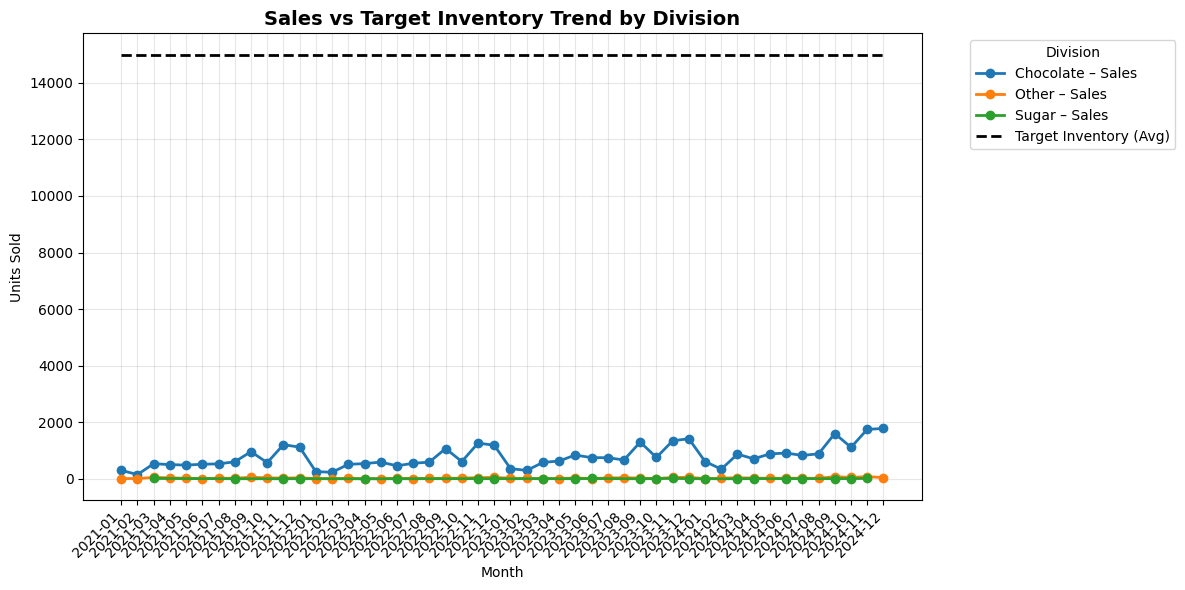

In [149]:
# pick the 5 busiest divisions
top5_divisions = (
    df_trend.groupby('Division')['Total Units Sold']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top5 = df_trend[df_trend['Division'].isin(top5_divisions)]

plt.figure(figsize=(12,6))

for division in df_top5['Division'].unique():
    div_data = df_top5[df_top5['Division'] == division]
    plt.plot(div_data['Month'], div_data['Total Units Sold'],
             marker='o', linewidth=2, label=f'{division} – Sales')

# target line (average across these divisions)
plt.plot(
    df_top5['Month'].unique(),
    [df_top5['Target Inventory'].mean()] * len(df_top5['Month'].unique()),
    color='black', linestyle='--', linewidth=2, label='Target Inventory (Avg)'
)

plt.title('Sales vs Target Inventory Trend by Division', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.legend(title='Division', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [150]:
sql_query = '''
SELECT
     candy_sales.Product_Name
    ,SUM(candy_sales.Units) AS 'Total Units Sold'
    ,AVG(candy_targets.Target) AS 'Target Inventory'
FROM candy_sales
JOIN candy_targets
    ON candy_sales.Division = candy_targets.Division
GROUP BY
     candy_sales.Product_Name
ORDER BY
     [Total Units Sold] DESC
'''
df_summary = pd.read_sql(sql_query, cnxn)
df_summary


/var/folders/8g/9gvwpcx5643bbxxh_35f037w0000gq/T/ipykernel_45778/89457400.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_summary = pd.read_sql(sql_query, cnxn)


,Product_Name,Total Units Sold,Target Inventory
0,Wonka Bar - Milk Chocolate,8267,27000
1,Wonka Bar -Scrumdiddlyumptious,7743,27000
2,Wonka Bar - Triple Dazzle Caramel,7596,27000
3,Wonka Bar - Fudge Mallows,6914,27000
4,Wonka Bar - Nutty Crunch Surprise,6755,27000
5,Wonka Gum,478,3000
6,Lickable Wallpaper,393,3000
7,Kazookles,371,3000
8,SweeTARTS,41,15000
9,Laffy Taffy,27,15000


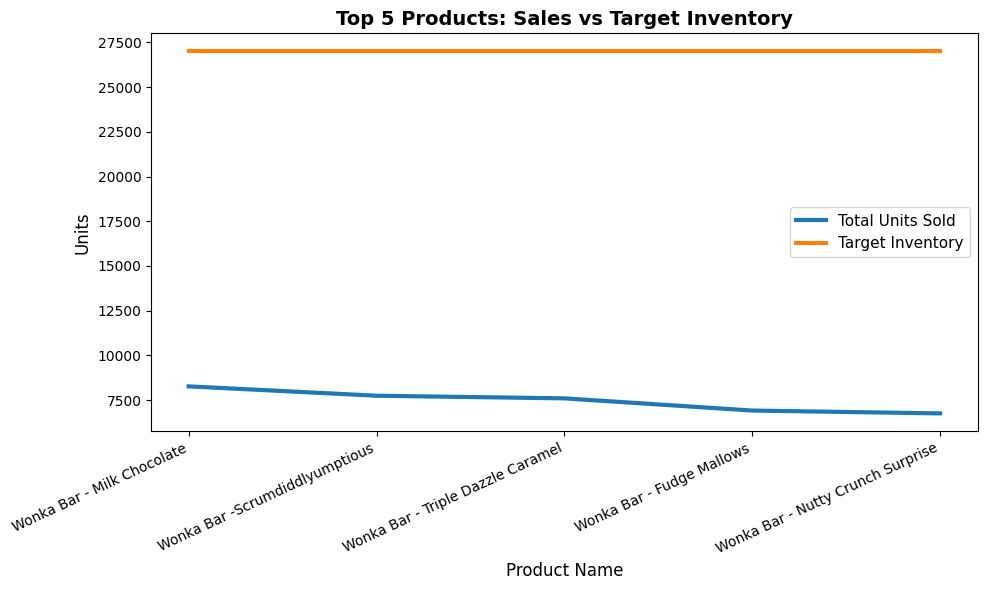

In [154]:
# Only top 5 products
df_top5 = df_summary.head(5)

plt.figure(figsize=(10,6))
plt.plot(df_top5['Product_Name'], df_top5['Total Units Sold'], linewidth=3, label='Total Units Sold')
plt.plot(df_top5['Product_Name'], df_top5['Target Inventory'], linewidth=3, label='Target Inventory')

plt.title('Top 5 Products: Sales vs Target Inventory', fontsize=14, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Units', fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


In [156]:
pwd

'/Users/school/Juliana-G/TeamMember/Juliana_Homework'

In [157]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)